#  PA1 : INTRODUCTION TO ML WORKFLOW AND DECISION TREE

### Task 1: A classification example: fetal heart condition diagnosis

#### Step 1.1 Reading the data

In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 

data = pd.read_csv("CTG.csv",skiprows=1) 
data.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [4]:
# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()
# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)
# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)
# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)
# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Step 1.2  Training the baseline classifier

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy_clf = DummyClassifier(strategy='most_frequent')
clf1 = cross_val_score(dummy_clf, Xtrain, Ytrain)
print(clf1, f'\nThe mean score is {np.mean(clf1)}')

[0.78235294 0.78235294 0.77941176 0.77941176 0.77941176] 
The mean score is 0.7805882352941176


#### Step 1.3 Trying out some different classifiers

##### Tree-based classifiers:

*DecisionTreeClassifier*

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
# clf.fit(Xtrain, Ytrain)
clf2 = cross_val_score(tree_clf, Xtrain, Ytrain)
print(clf2, f'\nand the mean classification accuracy for DecisionTreeClassifier is {np.mean(clf2)}')

[0.91764706 0.92647059 0.90588235 0.92647059 0.93823529] 
and the mean classification accuracy for DecisionTreeClassifier is 0.9229411764705884


In [7]:
#tune the parameter
for maxi in range(2, 20, 2):
  tree_clf = DecisionTreeClassifier(max_depth = maxi)
  clf2 = cross_val_score(tree_clf, Xtrain, Ytrain)
  print(clf2, f'\nand the mean classification accuracy for max depth choice {maxi} is {np.mean(clf2)}\n')

[0.88823529 0.90294118 0.87647059 0.85882353 0.87647059] 
and the mean classification accuracy for max depth choice 2 is 0.8805882352941176

[0.92058824 0.94117647 0.90588235 0.90882353 0.92058824] 
and the mean classification accuracy for max depth choice 4 is 0.9194117647058823

[0.91764706 0.94705882 0.90882353 0.92647059 0.95588235] 
and the mean classification accuracy for max depth choice 6 is 0.9311764705882354

[0.93529412 0.94411765 0.91764706 0.90882353 0.95      ] 
and the mean classification accuracy for max depth choice 8 is 0.9311764705882352

[0.91764706 0.92647059 0.91176471 0.90882353 0.93235294] 
and the mean classification accuracy for max depth choice 10 is 0.9194117647058823

[0.91470588 0.95294118 0.90588235 0.91470588 0.93823529] 
and the mean classification accuracy for max depth choice 12 is 0.9252941176470587

[0.91764706 0.94705882 0.92058824 0.91470588 0.93823529] 
and the mean classification accuracy for max depth choice 14 is 0.9276470588235293

[0.9058823

##### Findings: We tried to tune the parameters of DecisionTreeClassifier and observer that perfomance have increased after tuning ,it performs well at the maximum depth 8 with mean 0.93412

*Random forest*

In [8]:
from sklearn.ensemble import RandomForestClassifier
rforest_clf = RandomForestClassifier()
clf3 = cross_val_score(rforest_clf, Xtrain, Ytrain)
print(clf3, f'\nand the mean classification accuracy of RandomForestClassifier is {np.mean(clf3)}')

[0.93823529 0.95882353 0.92647059 0.93529412 0.94411765] 
and the mean classification accuracy of RandomForestClassifier is 0.9405882352941177


*GradientBoostingClassifier*

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
bosting_clf = GradientBoostingClassifier()
clf4 = cross_val_score(bosting_clf, Xtrain, Ytrain)
print(clf4, f'\nand the mean classification accuracy of GradientBoostingClassifier is {np.mean(clf4)}')

[0.94117647 0.96176471 0.94411765 0.94411765 0.95294118] 
and the mean classification accuracy of GradientBoostingClassifier is 0.9488235294117647


#### Linear Classification

*Linear perceptron classifier.*

In [11]:
from sklearn.linear_model import Perceptron
linear_clf = Perceptron()
clf5 = cross_val_score(linear_clf, Xtrain, Ytrain)
print(clf5, f'\nand the mean classification accuracy of Perceptron is {np.mean(clf5)}')

[0.84705882 0.88529412 0.82941176 0.85294118 0.71176471] 
and the mean classification accuracy of Perceptron is 0.825294117647059


*LogisticRegression*

In [12]:
# todo not showing the convergence warning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
clf6 = cross_val_score(logistic_clf, Xtrain, Ytrain)
print(clf6, f'\nand the mean classification accuracy of LogisticRegression is {np.mean(clf6)}')

[0.88823529 0.88235294 0.87058824 0.87352941 0.85588235] 
and the mean classification accuracy of LogisticRegression is 0.8741176470588234


*Linear Support Vector Classification.*

In [13]:
# todo: hide the future warning
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.svm import LinearSVC
svm_clf = LinearSVC()
clf7 = cross_val_score(svm_clf, Xtrain, Ytrain)
print(clf7, f'\nand the mean classification accuracy of LinearSVC is {np.mean(clf7)}')

[0.88235294 0.86470588 0.86176471 0.88823529 0.86470588] 
and the mean classification accuracy of LinearSVC is 0.8723529411764706


##### Neural network classifier

*Multi-layer Perceptron classifier.*

In [14]:
from sklearn.neural_network import MLPClassifier
neural_clf = MLPClassifier()
clf8 = cross_val_score(neural_clf, Xtrain, Ytrain)
print(clf8, f'\nand the mean classification accuracy of MLPClassifier is {np.mean(clf8)}')

[0.86176471 0.9        0.88529412 0.88823529 0.87058824] 
and the mean classification accuracy of MLPClassifier is 0.8811764705882353


In [15]:
# tune the hyperparameters (the number of layers & neurons)
hidden_layer_structures = [(50,), (200,), (50, 30), (200, 50), (100, 50, 30)]
for structure in hidden_layer_structures:
  neural_clf = MLPClassifier(hidden_layer_sizes = structure)
  clf = cross_val_score(neural_clf, Xtrain, Ytrain)
  print(clf, f'\nand the mean classification accuracy for {structure} is {np.mean(clf)}\n')

[0.89705882 0.88235294 0.85588235 0.9        0.89117647] 
and the mean classification accuracy for (50,) is 0.8852941176470589

[0.89117647 0.88823529 0.88235294 0.89411765 0.83823529] 
and the mean classification accuracy for (200,) is 0.8788235294117646

[0.89705882 0.88529412 0.83235294 0.88529412 0.89705882] 
and the mean classification accuracy for (50, 30) is 0.8794117647058824

[0.82058824 0.88529412 0.87647059 0.88529412 0.88235294] 
and the mean classification accuracy for (200, 50) is 0.8699999999999999

[0.91176471 0.91176471 0.85294118 0.90588235 0.89117647] 
and the mean classification accuracy for (100, 50, 30) is 0.8947058823529412



##### Findings: We tried to tune the hyperparameter(layers & neurons), and the classifier performs better at (200，) with mean score 0.8935294117647059

#### Step 1.4  Final evaluation

##### We found  out that the Gradient Boosting Classifier has the best accuracy and the Random forest method also performs well, so we will make the Final evaluation based on these 2 methods

In [16]:
from sklearn.metrics import accuracy_score
 #Perfomance of gradient boosting 
bosting_clf.fit(Xtrain, Ytrain)
Yguess = bosting_clf.predict(Xtest)
print(f'The performance of Gradient Boosting Clf is {accuracy_score(Ytest, Yguess)}\n')
#Perfomance of random forest
rforest_clf.fit(Xtrain, Ytrain)
Yguess = rforest_clf.predict(Xtest)
print(f'The performance of Random forest Clf is {accuracy_score(Ytest, Yguess)}')

The performance of Gradient Boosting Clf is 0.9295774647887324

The performance of Random forest Clf is 0.9272300469483568


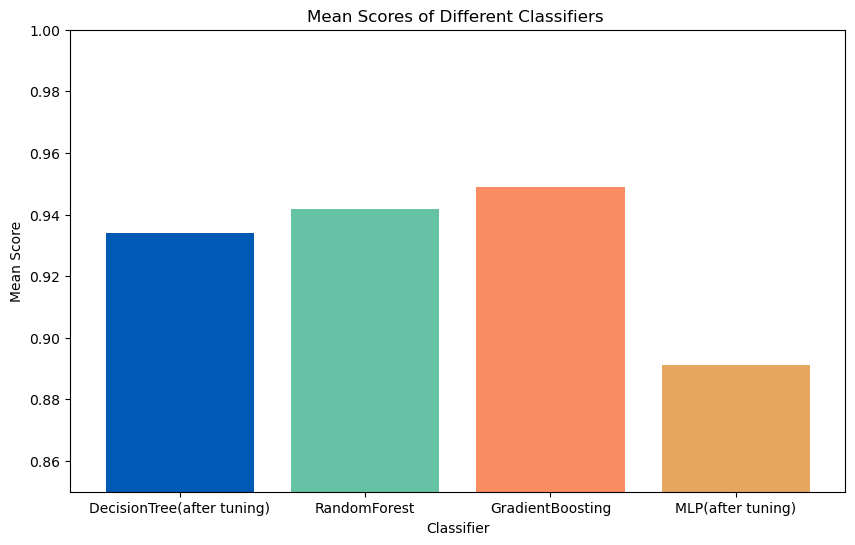

In [25]:
#plotting
import matplotlib.pyplot as plt
# Mean scores of different classifiers 
classifiers = ['DecisionTree(after tuning)', 'RandomForest', 'GradientBoosting', 'MLP(after tuning)']
scores = [0.9341176470588234, 0.941764705882353, 0.9488235294117647, 0.8911764705882353]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, scores, color=['#005AB5', '#66C2A5', '#FC8D62', '#E6A65D'])
plt.title('Mean Scores of Different Classifiers ')
plt.xlabel('Classifier')
plt.ylabel('Mean Score')
plt.ylim(0.85, 1)  # Setting y-axis limit for better visualization
plt.show()

#### Findings: From the visualization we can say that GradientBoosting has best accuracy compared to other models.

### Task 2: Decision trees for classification

*First, the setups*

In [17]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [18]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [28]:
from graphviz import Source

In [35]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    # def draw_tree(self):
    #     graph = Digraph()
    #     self.root.draw_tree(graph, 0, self.names)
    #     return graph
    
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return Source(graph.source) 
    
    
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
     
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        
        default_value = self.get_default_value(Y)

        
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [36]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
           
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

       
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [37]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [38]:
tree_clf2 = TreeClassifier()
tree_clf2.fit(Xtrain, Ytrain)
print(np.mean(cross_val_score(tree_clf2, Xtrain, Ytrain)))
for i in range(2,32,2):
  depth = i
  current_clf = TreeClassifier(max_depth = i)
  # current_clf.fit(Xtrain, Ytrain)
  print(f'the score for max depth {i} is {np.mean(cross_val_score(current_clf, Xtrain, Ytrain))}')

0.9099999999999999
the score for max depth 2 is 0.8911764705882353
the score for max depth 4 is 0.9105882352941176
the score for max depth 6 is 0.9099999999999999
the score for max depth 8 is 0.9099999999999999
the score for max depth 10 is 0.9099999999999999
the score for max depth 12 is 0.9076470588235294
the score for max depth 14 is 0.9111764705882353
the score for max depth 16 is 0.9123529411764706
the score for max depth 18 is 0.9117647058823529
the score for max depth 20 is 0.9064705882352941
the score for max depth 22 is 0.9058823529411765
the score for max depth 24 is 0.9047058823529411
the score for max depth 26 is 0.9041176470588235
the score for max depth 28 is 0.9023529411764706
the score for max depth 30 is 0.9029411764705882


#### Findings: We optimized the max depth hyperparameter for the classifier to achieve the best cross-validation performance, finding that a maximum depth of 16 yielded the optimal result.

In [39]:
#trying the max_depth=16 in test data
besttree_clf = TreeClassifier(max_depth=16)
besttree_clf.fit(Xtrain, Ytrain)
Yguess = besttree_clf.predict(Xtest)
print(f'The performance of the tree Clf is {accuracy_score(Ytest, Yguess)}')

The performance of the tree Clf is 0.8826291079812206


#### Fimdings: After adjusting the max_depth parameter through testing, we found that max_depth equal  to 16 resulted in the best performance when evaluated on the test set with score of perfomance equal to 0.8826

#### Visualization of the tree

#### The jupyter can't transfer the svg picture created by the draw_tree() to a format that can be read in HTML directly. So I save the image and embedded it into the next Markdown block.

In [ ]:
clf = TreeClassifier(max_depth=2)
clf.fit(Xtrain, Ytrain)
clf.draw_tree()

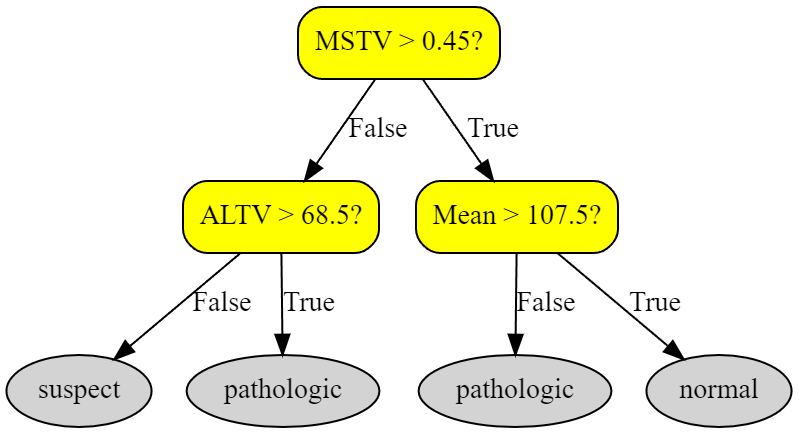

### Task 3 A regression example: predicting apartment prices

In [43]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [44]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
dummy_r = DummyRegressor()
print(cross_val_score(dummy_r, Xtrain, Ytrain, scoring='neg_mean_squared_error'))
print(np.mean((cross_validate(dummy_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score'])))

[-0.39897319 -0.37113485 -0.38083108 -0.39057156 -0.40475168]
-0.38925247260237567


*Linear Regression*

In [45]:
from sklearn.linear_model import LinearRegression
linear_r = LinearRegression()
print(np.mean(cross_validate(linear_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))

-0.3013986588767198


*Ridge*

In [46]:
from sklearn.linear_model import Ridge
ridge_r = Ridge()
print(np.mean(cross_validate(ridge_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))

-0.3013978423217975


*Lasso*

In [47]:
from sklearn.linear_model import Lasso
lasso_r = Lasso()
print(np.mean(cross_validate(lasso_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))

-0.3010470671748872


*DecisionTreeRegressor*

In [48]:
from  sklearn.tree import DecisionTreeRegressor
decisiontree_r = DecisionTreeRegressor()
print(np.mean(cross_validate(decisiontree_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))

-0.5278114082240045


*RandomForestRegressor*

In [49]:
from  sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor()
print(np.mean(cross_validate(forest_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))

-0.2836826484276428


*GradientBoostingRegressor*

In [50]:
from  sklearn.ensemble import GradientBoostingRegressor
gradient_r = GradientBoostingRegressor()
print(np.mean(cross_validate(gradient_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))

-0.2645157790636336


*MLPRegressor*

In [51]:
from  sklearn.neural_network import MLPRegressor
neural_r = MLPRegressor()
print(np.mean(cross_validate(neural_r, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))

-2936.944565659123


*Final evaluation*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


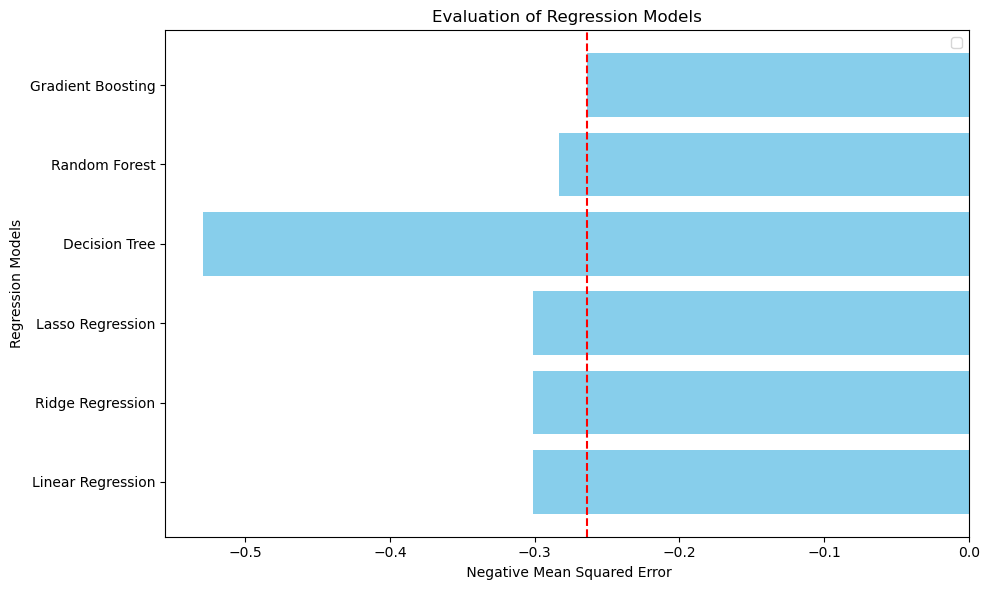

In [52]:
# Regression models and their evaluation scores
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
scores = [-0.301, -0.301, -0.301, -0.529, -0.283, -0.264]

# Selected model
#selected_model = 'Gradient Boosting'
selected_score = -0.264

# Create bar plot with x and y axes interchanged
plt.figure(figsize=(10, 6))
plt.barh(models, scores, color='skyblue')
plt.ylabel('Regression Models')
plt.xlabel(' Negative Mean Squared Error')
plt.title('Evaluation of Regression Models')
plt.axvline(selected_score, color='red', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

#### Findings: Based on the score of all the methods above, the Gradient Boosting has the best performance with evaluation score -0.2645
And we will do the final evaluation on test data based on this.

In [64]:
from sklearn.metrics import mean_squared_error
bestreg = GradientBoostingRegressor()
# print(np.mean(cross_validate(r1, Xtrain, Ytrain, scoring='neg_mean_squared_error')['test_score']))
bestreg.fit(Xtrain, Ytrain)
print(f'the MSE is {mean_squared_error(Ytest, bestreg.predict(Xtest))}')

the MSE is 0.2714611772972582


### Task 4 Decision trees for regression

#### Step 4.1. Implementing the regression model

In [54]:
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import statistics
class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, homo_threshold=0.3):
        super().__init__(max_depth)
        self.homo_threshold = homo_threshold
        
    def fit(self, X, Y):
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))


    def get_default_value(self, Y):
        return np.mean(Y)

    def is_homogeneous(self, Y):
        #todo set it to 100?
        return np.var(Y) < self.homo_threshold        

    def best_split(self, X, Y, feature):

        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)
        max_score = -np.inf
        max_i = None

        # todo should keep the loop, different statistic

        # Go through all the positions (excluding the last position).
        # todo n-2?
        var_full = np.var(Y)
        for i in range(0, n-1):

            # todo for each i(s, splitting poitn),we just compute the below and above part seperately
            # var_full = np.var(Y)
            # var_full2 = 1/n * np.sum(Y**2) - 1/n**2 * (np.sum(Y))**2 
            x_i = X_sorted[i]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            low_y = Y_sorted[0 : i + 1]
            low_var = np.var(low_y)
            # low_var = 1 / len(low_y) * np.sum(np.array(low_y) ** 2) - 1 / len(low_y) ** 2 * (np.sum(low_y)) ** 2
            mse_low = low_var * (i + 1)

            high_y = Y_sorted[i + 1 : n]
            high_var = np.var(high_y)
            # high_var = 1 / len(high_y) * np.sum(np.array(high_y) ** 2) - 1 / len(high_y) ** 2 * (np.sum(high_y)) ** 2
            mse_high = high_var * (n - i - 1)

            var_reduction = var_full - mse_low/n - mse_high/n
            if var_reduction > max_score:
                max_score = var_reduction
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [55]:
np.var(Y)

0.3918834986827815

*The variance of Y is around 0.4, so our choice of homogenity threshold should be significantly less than this one. We set it to 0.1 and also add it to the hyperparameter part of the function.*

In [ ]:
rls = TreeRegressor(max_depth=1, homo_threshold = 0.1)
rls.fit(Xtrain, Ytrain)
rls.draw_tree()

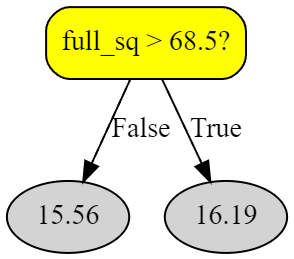

#### Step 4.2. Sanity check

In [57]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

(XCheck, YCheck) = make_some_data(200)
np.var(YCheck)

0.2366881644708669

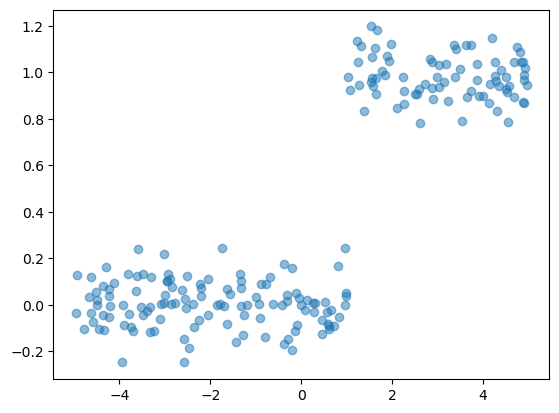

In [58]:
plt.scatter(XCheck[:, 0], YCheck, alpha=0.5)
plt.show()

In [ ]:
rlscheck = TreeRegressor(max_depth=1, homo_threshold = 0)
rlscheck.fit(XCheck, YCheck)
rlscheck.draw_tree()

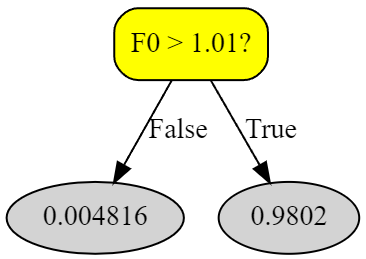

##### Findings:  A decision tree with a max depth of 1 and a homogeneity threshold of 0 would effectively capture the underlying structure of the data. If we allow the tree depth to be a large number, then the tree may have the problem of overfitting. Our data has obvious binary characteristics, so we should not expect a tree with many leaves.

##### Step 4.3. Predicting apartment prices using decision tree regression

In [60]:
r3 = TreeRegressor(max_depth=12, homo_threshold = 0.1)
r3.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, r3.predict(Xtest))

0.3344961794193524

#### Findings:  We use a decision tree with a max depth of 12 and a homogeneity threshold of 0.1. The evaluation score is 0.3345

#### Step 4.4. Underfitting and overfitting

In [61]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

mse_train = [0] * 13
mse_test = [0] * 13
for i in range(0,13):
  r = TreeRegressor(max_depth=i, homo_threshold = 0.1)
  r.fit(Xtrain, Ytrain)

  # on train data
  train_predictions = r.predict(Xtrain)
  mse_train[i] = mean_squared_error(Ytrain, train_predictions)

  # on test data
  test_predictions = r.predict(Xtest)
  mse_test[i] = mean_squared_error(Ytest, test_predictions)

  print(f'the mean squared error for train data at max depth{i}:{mse_train[i]}')
  print(f'the mean squared error for test data at max depth{i}:{mse_test[i]}\n')

the mean squared error for train data at max depth0:0.3891468647585388
the mean squared error for test data at max depth0:0.4028398414133475

the mean squared error for train data at max depth1:0.3263543480100574
the mean squared error for test data at max depth1:0.34098250711388134

the mean squared error for train data at max depth2:0.30042490282992007
the mean squared error for test data at max depth2:0.3116427403885958

the mean squared error for train data at max depth3:0.28927232915183554
the mean squared error for test data at max depth3:0.30188395972140913

the mean squared error for train data at max depth4:0.2807451934658121
the mean squared error for test data at max depth4:0.29310031188060437

the mean squared error for train data at max depth5:0.2742861310363099
the mean squared error for test data at max depth5:0.2908261342315253

the mean squared error for train data at max depth6:0.2667434009364825
the mean squared error for test data at max depth6:0.28643634372540716



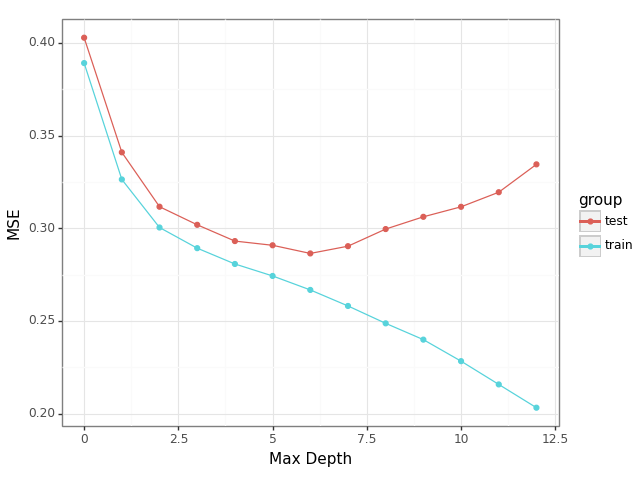

<Figure Size: (640 x 480)>

In [62]:
from plotnine import *
d1 = mse_train
d2 = mse_test
d = [d1, d2]
depth = range(0,13)
df1 = pd.DataFrame({'MSE': d1, 'group': 'train', 'depth':depth})
df2 = pd.DataFrame({'MSE': d2, 'group': 'test', 'depth':depth})

df = pd.concat([df1, df2])

p3 = (ggplot(df, aes(x = 'depth', y = 'MSE', color = 'group'))
      + geom_line()
      + geom_point()
      + theme_minimal()
      + theme_bw()
      + labs(x = 'Max Depth')
      )
p3

#### Findings: based on the MSE values and the plot, we can observe that as the maximum depth of the decision tree increases, the MSE for the training data continues to decrease, while the MSE for the test data initially decreases but then starts to increase after a certain point(max_depth=6). This phenomenon is indicative of overfitting. 